<h2>Задание 1</h2

<h3>1.1</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
import scipy.stats as scs

In [3]:
data_red = pd.read_csv('wine_quality/winequality-red.csv', sep = ';')
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data_white = pd.read_csv('wine_quality/winequality-white.csv', sep = ';')
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
data_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
print(f"duplicates in red wine: {len(data_red)- len(data_red.drop_duplicates())}")
print(f"duplicates in white wine: {len(data_white)- len(data_white.drop_duplicates())}")
print(f"all duplicates: {len(data_red + data_white)- len(data_red.drop_duplicates() + data_white.drop_duplicates())}")

duplicates in red wine: 240
duplicates in white wine: 937
all duplicates: 722


<h3>1.2</h3>

In [10]:
def visualization(data):
    data.hist(figsize = (14, 10))
    data = data.drop(columns = ["quality"])

    fig, axs = plt.subplots(nrows = 4 , ncols = 3, figsize = (14, 14))
    i = 0
    for column in data:
        axs[i % 4, i % 3].set_title(column)
        axs[i % 4, i % 3].boxplot(data[column])
        i += 1
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.corr(), annot = True, fmt='.1g')

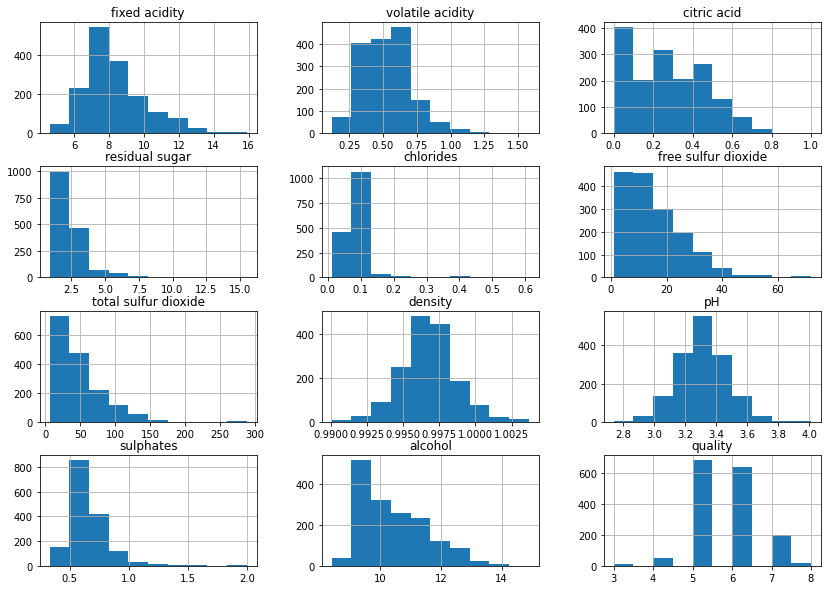

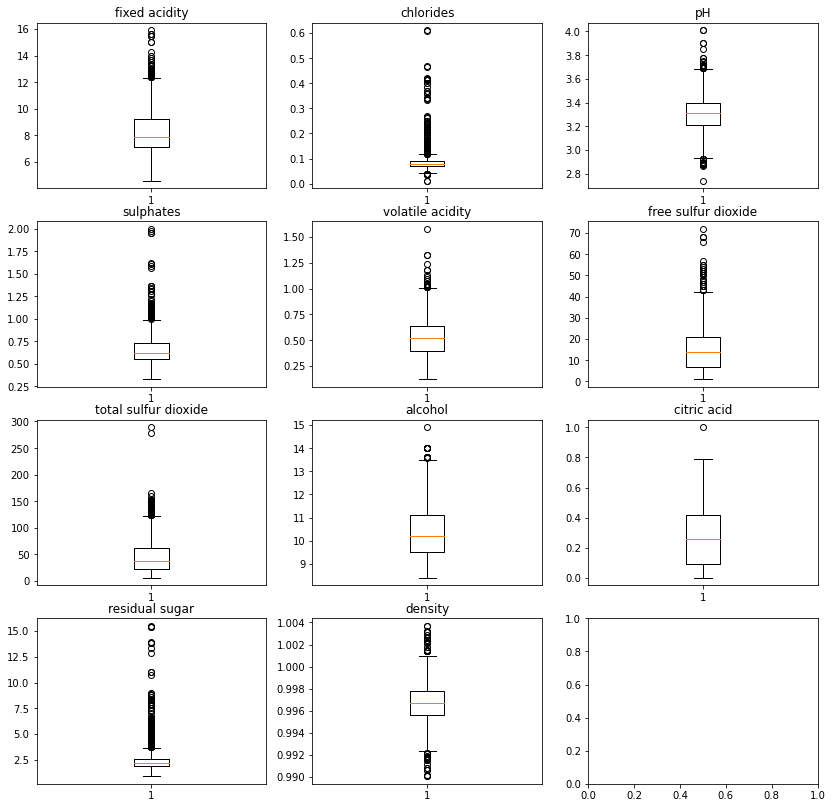

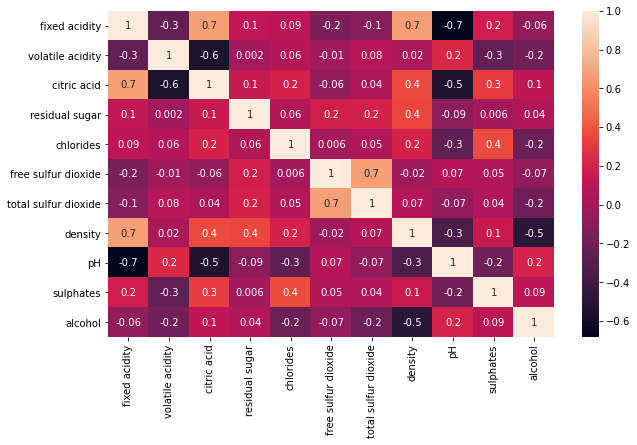

In [11]:
visualization(data_red)

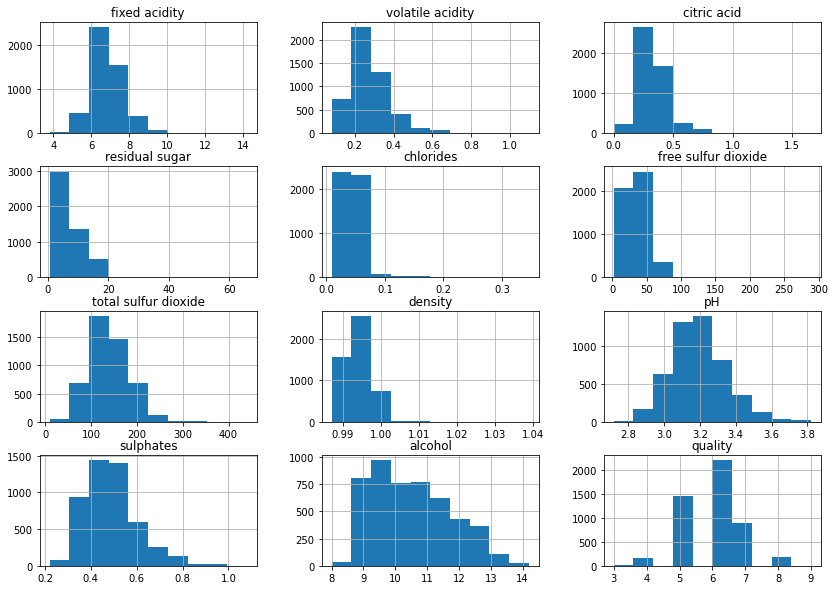

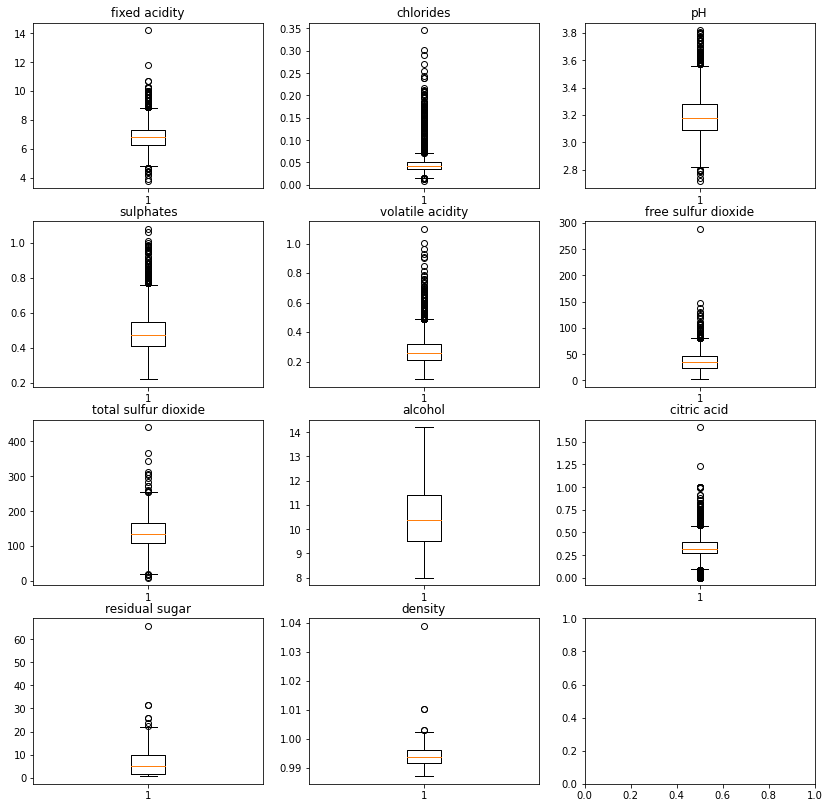

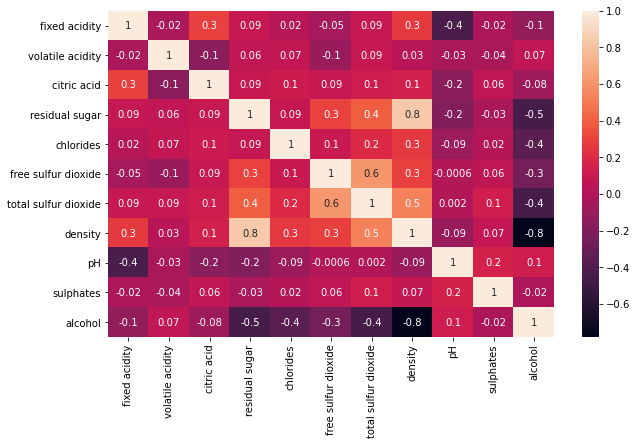

In [12]:
visualization(data_white)

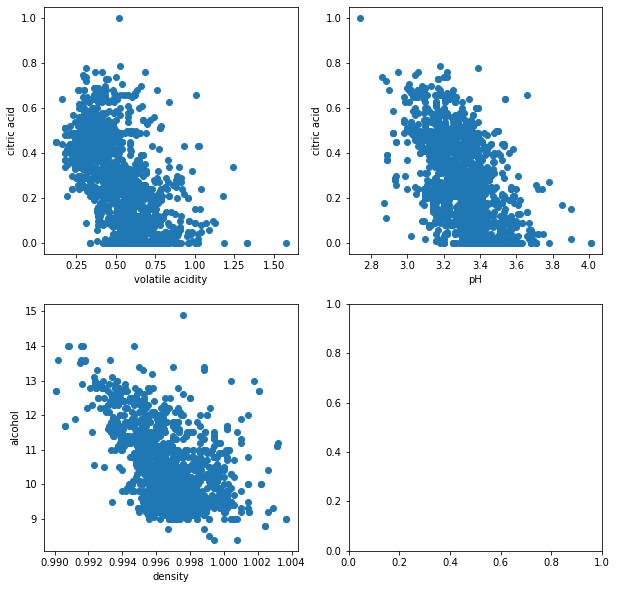

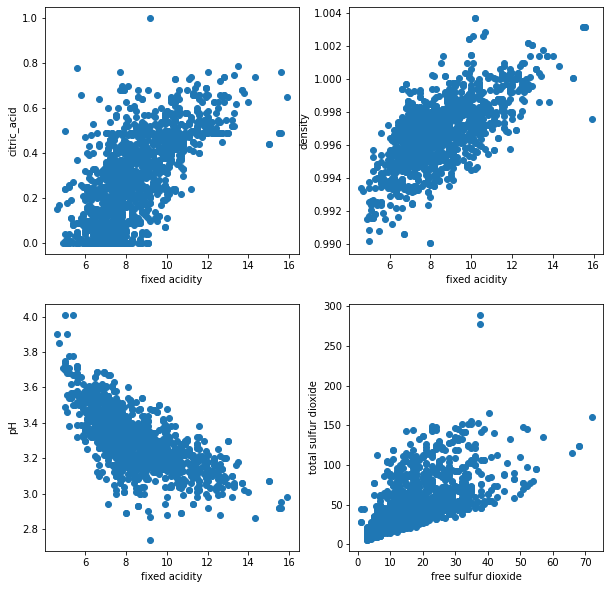

In [13]:
# для красного вина
def visual_red_scatter(data):
    fig, axs = plt.subplots(nrows = 2 , ncols = 2, figsize = (10, 10))    
    axs[0, 0].set_xlabel("volatile acidity")
    axs[0, 0].set_ylabel("citric acid")
    axs[0, 0].scatter(data["volatile acidity"], data["citric acid"])

    axs[0, 1].set_xlabel("pH")
    axs[0, 1].set_ylabel("citric acid")
    axs[0, 1].scatter(data["pH"], data["citric acid"])

    axs[1, 0].set_xlabel("density")
    axs[1, 0].set_ylabel("alcohol")
    axs[1, 0].scatter(data["density"], data["alcohol"])

    fig, axs = plt.subplots(nrows = 2 , ncols = 2, figsize = (10, 10))    
    axs[0, 0].set_xlabel("fixed acidity")
    axs[0, 0].set_ylabel("citric_acid")
    axs[0, 0].scatter(data["fixed acidity"], data["citric acid"])

    axs[0, 1].set_xlabel("fixed acidity")
    axs[0, 1].set_ylabel("density")
    axs[0, 1].scatter(data["fixed acidity"], data["density"])

    axs[1, 0].set_xlabel("fixed acidity")
    axs[1, 0].set_ylabel("pH")
    axs[1, 0].scatter(data["fixed acidity"], data["pH"])

    axs[1, 1].set_xlabel("free sulfur dioxide")
    axs[1, 1].set_ylabel("total sulfur dioxide")
    axs[1, 1].scatter(data["free sulfur dioxide"], data["total sulfur dioxide"])

visual_red_scatter(data_red)

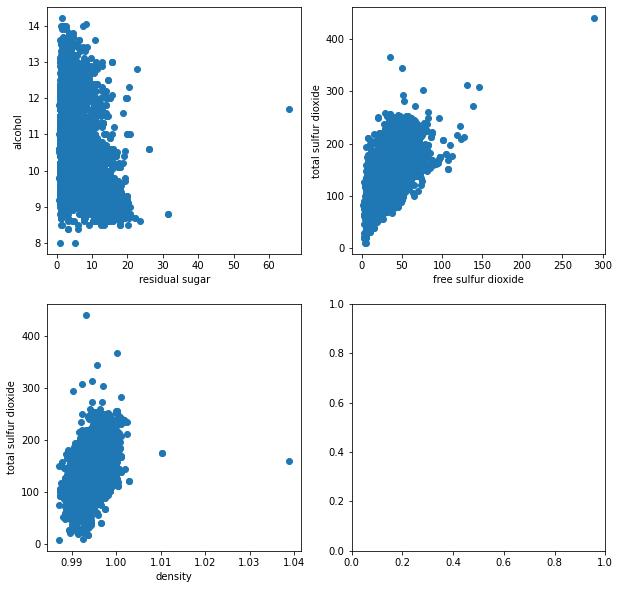

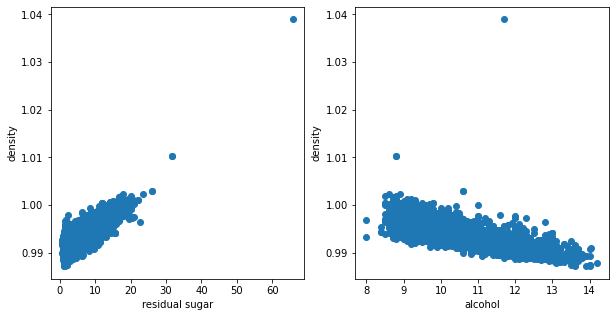

In [14]:
# для белого вина
def visual_white_scatter(data):
    fig, axs = plt.subplots(nrows = 2 , ncols = 2, figsize = (10, 10))    
    axs[0, 0].set_xlabel("residual sugar")
    axs[0, 0].set_ylabel("alcohol")
    axs[0, 0].scatter(data["residual sugar"], data["alcohol"])

    axs[0, 1].set_xlabel("free sulfur dioxide")
    axs[0, 1].set_ylabel("total sulfur dioxide")
    axs[0, 1].scatter(data["free sulfur dioxide"], data["total sulfur dioxide"])

    axs[1, 0].set_xlabel("density")
    axs[1, 0].set_ylabel("total sulfur dioxide")
    axs[1, 0].scatter(data["density"], data["total sulfur dioxide"])

    fig, axs = plt.subplots(ncols = 2, figsize = (10, 5))    
    axs[0].set_xlabel("residual sugar")
    axs[0].set_ylabel("density")
    axs[0].scatter(data["residual sugar"], data["density"])

    axs[1].set_xlabel("alcohol")
    axs[1].set_ylabel("density")
    axs[1].scatter(data["alcohol"], data["density"])

visual_white_scatter(data_white)

<h2>Задание 2</h2>

<h3>2.1</h3>

In [15]:
# duplicateRows = data[data.duplicated()]

data2_red = data_red.drop_duplicates()
data2_white = data_white.drop_duplicates()

print(f"number red wine: {data2_red.shape[0]}")
print(f"number white wine: {data2_white.shape[0]}")
print(f"number all wine: {data2_red.shape[0] + data2_white.shape[0]}")

number red wine: 1359
number white wine: 3961
number all wine: 5320


<h3>Разделение выборки данных на обучающую, вал...</h3>

In [16]:
df_buf = data2_red.sample(frac = 0.9, random_state = 200)
data2_red_test = data2_red.drop(df_buf.index)

data2_red_train = df_buf.sample(frac = 0.667, random_state = 200)
data2_red_valid = df_buf.drop(data2_red_train.index)

print(f"sample size for all: \n{data2_red.shape}\n")
print(f"sample size for train: \n{data2_red_train.shape}\n")
print(f"sample size for valid: \n{data2_red_valid.shape}\n")
print(f"sample size for test: \n{data2_red_test.shape}")

sample size for all: 
(1359, 12)

sample size for train: 
(816, 12)

sample size for valid: 
(407, 12)

sample size for test: 
(136, 12)


In [17]:
df_buf = data2_white.sample(frac = 0.9, random_state = 200)
data2_white_test = data2_white.drop(df_buf.index)

data2_white_train = df_buf.sample(frac = 0.667, random_state = 200)
data2_white_valid = df_buf.drop(data2_white_train.index)

print(f"sample size for all: \n{data2_white.shape}\n")
print(f"sample size for train: \n{data2_white_train.shape}\n")
print(f"sample size for valid: \n{data2_white_valid.shape}\n")
print(f"sample size for test: \n{data2_white_test.shape}")

sample size for all: 
(3961, 12)

sample size for train: 
(2378, 12)

sample size for valid: 
(1187, 12)

sample size for test: 
(396, 12)


In [18]:
def get_clean_param(data):
	Q1 = data.quantile(q=.25)
	Q3 = data.quantile(q=.75)
	IQR = Q3 - Q1
	return Q1, Q3, IQR

def clean(data, Q1, Q3, IQR):
    data_clean = data[~((data < (Q1 - 1.5* IQR)) | (data > (Q3 + 1.5 * IQR)) & (data["quality"] > 4) & (data["quality"] < 7)).any(axis=1)]
    return data_clean

In [19]:
red_clean_param = get_clean_param(data2_red_train)
white_clean_param = get_clean_param(data2_white_train)

data3_red_train = clean(data2_red_train, red_clean_param[0], red_clean_param[1], red_clean_param[2])
data3_white_train = clean(data2_white_train, white_clean_param[0], white_clean_param[1], white_clean_param[2])

data3_red_valid = clean(data2_red_valid, red_clean_param[0], red_clean_param[1], red_clean_param[2])
data3_white_valid = clean(data2_white_valid, white_clean_param[0], white_clean_param[1], white_clean_param[2])

data3_red_test = clean(data2_red_test, red_clean_param[0], red_clean_param[1], red_clean_param[2])
data3_white_test = clean(data2_white_test, white_clean_param[0], white_clean_param[1], white_clean_param[2])

In [20]:
print(f"clean number in red wine: {data3_red_train.shape[0]}")
print(f"clean number in white wine: {data3_white_train.shape[0]}")
print(f"clean number in all wine: {data3_red_train.shape[0] + data3_white_train.shape[0]}")
print("")
print(f"number deleted data in red wine: {data2_red_train.shape[0] - data3_red_train.shape[0]}")
print(f"number deleted data in white wine: {data2_white_train.shape[0] - data3_white_train.shape[0]}")
print(f"number deleted data in all wine: {data2_red_train.shape[0] + data2_white_train.shape[0] - data3_red_train.shape[0] - data3_white_train.shape[0]}")

clean number in red wine: 787
clean number in white wine: 2318
clean number in all wine: 3105

number deleted data in red wine: 29
number deleted data in white wine: 60
number deleted data in all wine: 89


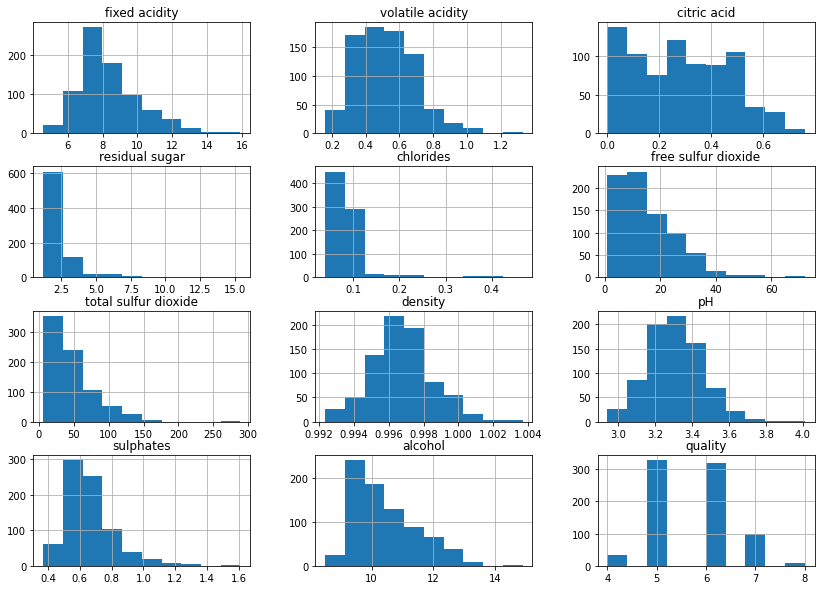

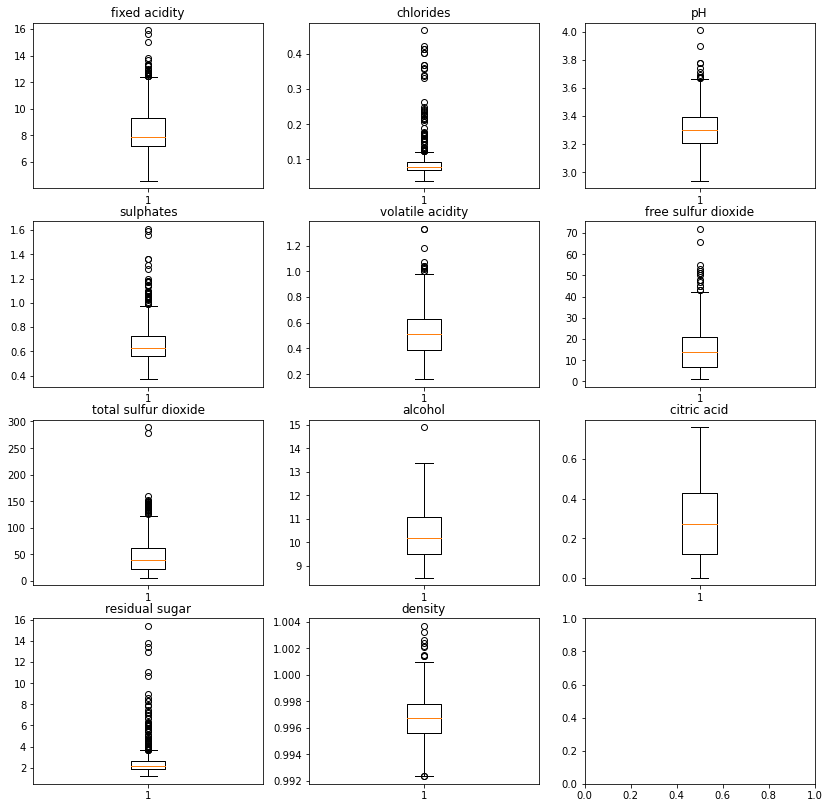

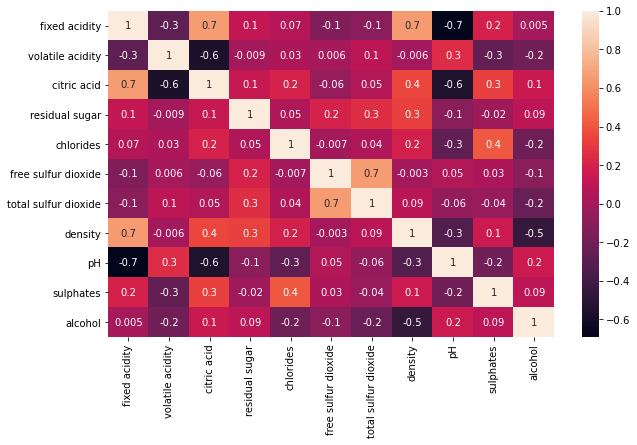

In [21]:
visualization(data3_red_train)

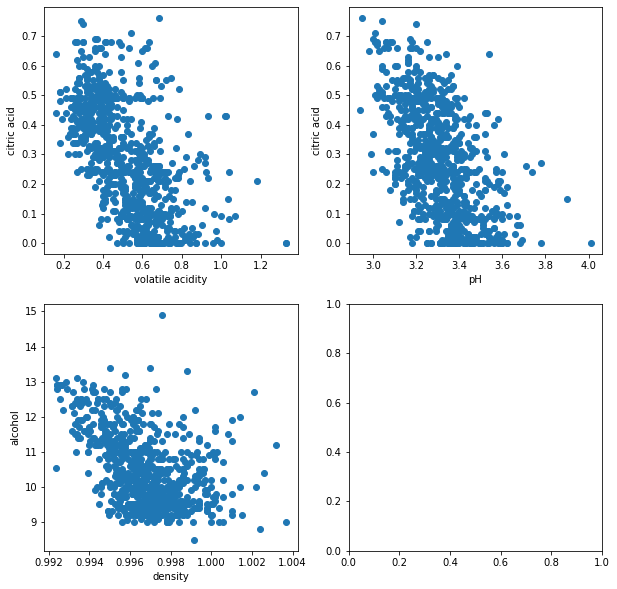

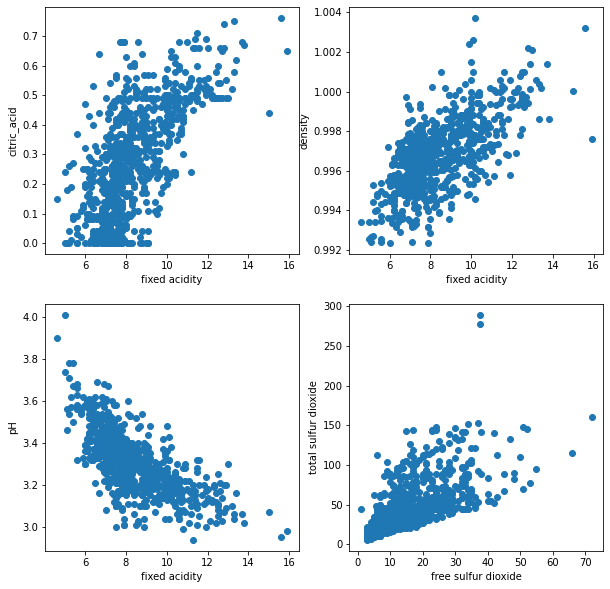

In [22]:
visual_red_scatter(data3_red_train)

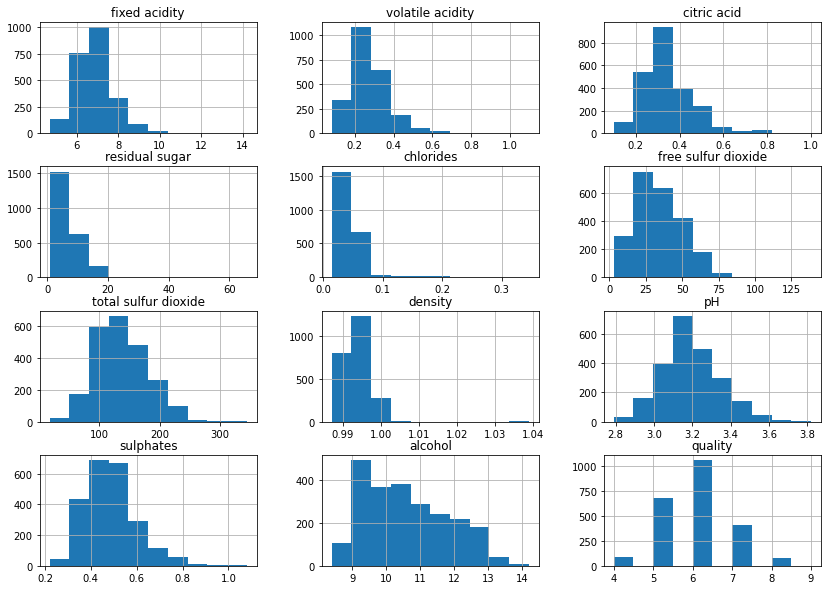

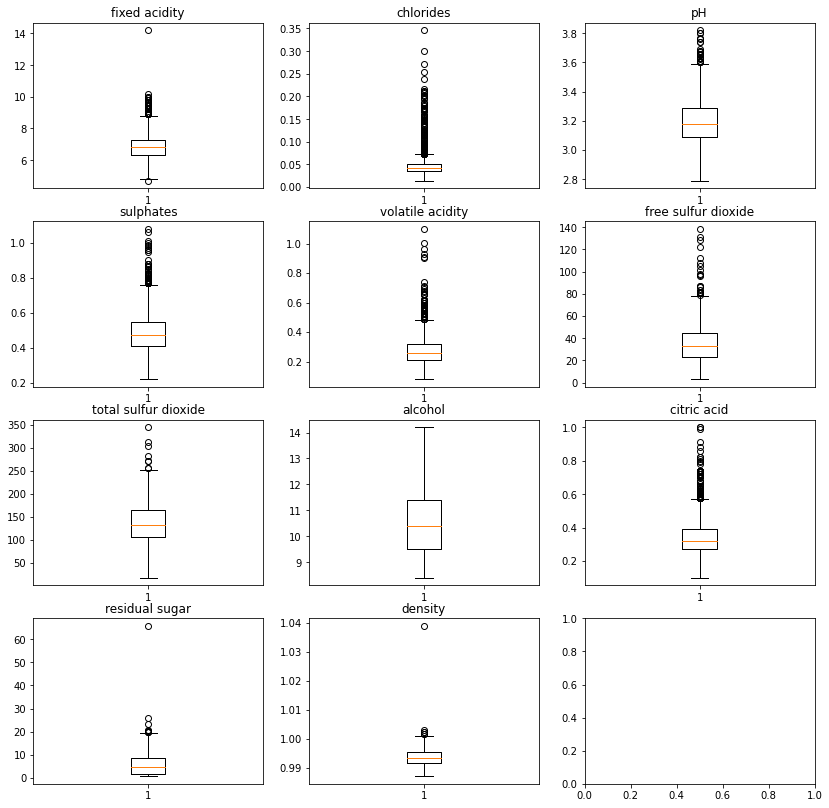

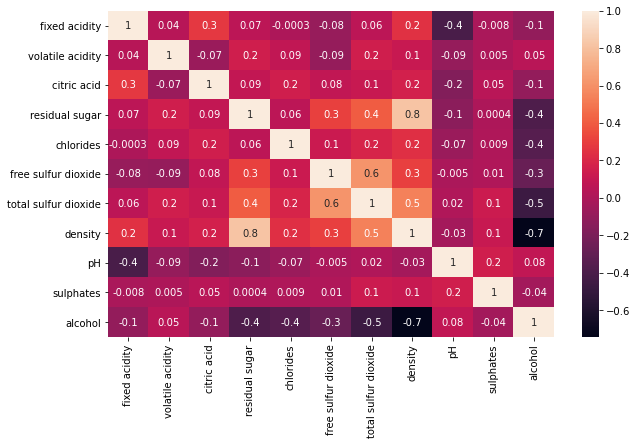

In [23]:
visualization(data3_white_train)

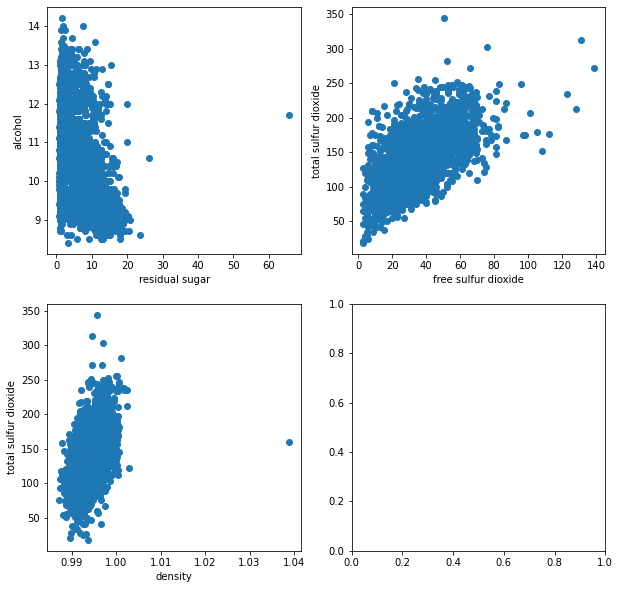

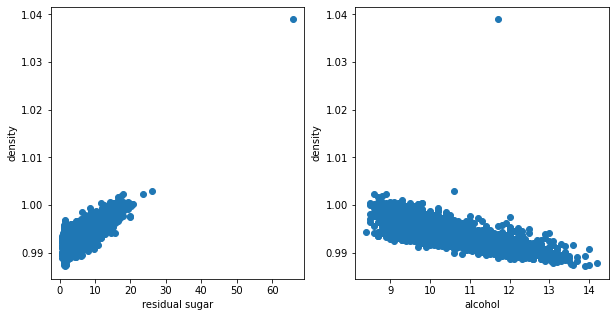

In [24]:
visual_white_scatter(data3_white_train)

<h3>2.2</h3>

In [25]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [26]:
def get_transformer_robust(data):
	data_other = data.drop(columns = ["pH", "quality"])
	transformer = RobustScaler().fit(data_other)
	return transformer

def get_transformer_norm(data):
    data_ph = data["pH"].to_numpy().reshape(-1, 1)
    transformer = StandardScaler().fit(data_ph)
    return transformer

In [27]:
def transform_data(data, transformer_robust, transformer_norm):    
    data_ph = data["pH"].to_numpy().reshape(-1, 1)
    data_quality = data["quality"].to_numpy()
    data_other = data.drop(columns = ["pH", "quality"])
    columns = [x for x in data_other]
    
    data_new = transformer_robust.transform(data_other)
    data_pH_norm = transformer_norm.transform(data_ph)
    
    data_new = pd.DataFrame(data_new, columns = columns)
    data_new["pH"] = data_pH_norm
    data_new["quality"] = data_quality
    return data_new

In [28]:
transformer_robust_red = get_transformer_robust(data3_red_train)
transformer_norm_red = get_transformer_norm(data3_red_train)

transformer_robust_white = get_transformer_robust(data3_white_train)
transformer_norm_white = get_transformer_norm(data3_white_train)

data4_red_train = transform_data(data3_red_train, transformer_robust_red, transformer_norm_red)
data4_white_train = transform_data(data3_white_train, transformer_robust_white, transformer_norm_white)

data4_red_valid = transform_data(data3_red_valid, transformer_robust_red, transformer_norm_red)
data4_white_valid = transform_data(data3_white_valid, transformer_robust_white, transformer_norm_white)

data4_red_test = transform_data(data3_red_test, transformer_robust_red, transformer_norm_red)
data4_white_test = transform_data(data3_white_test, transformer_robust_white, transformer_norm_white)

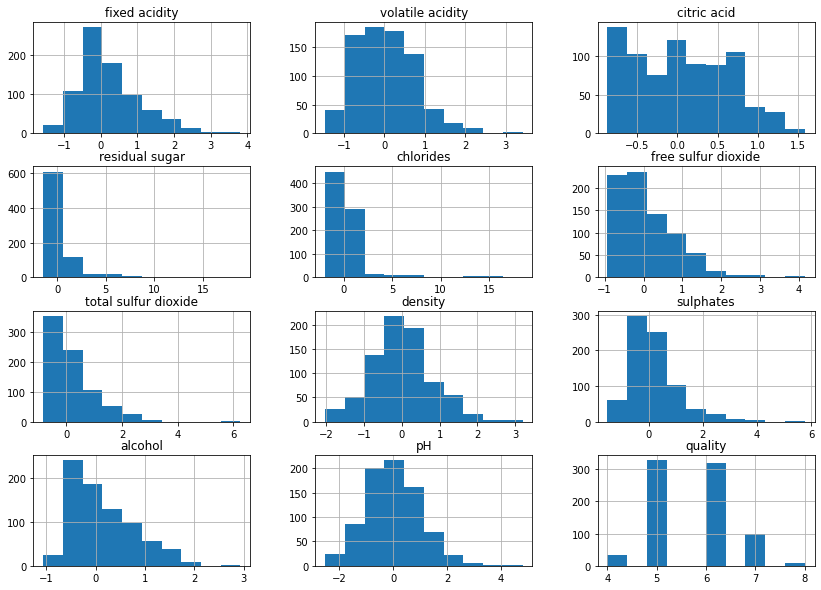

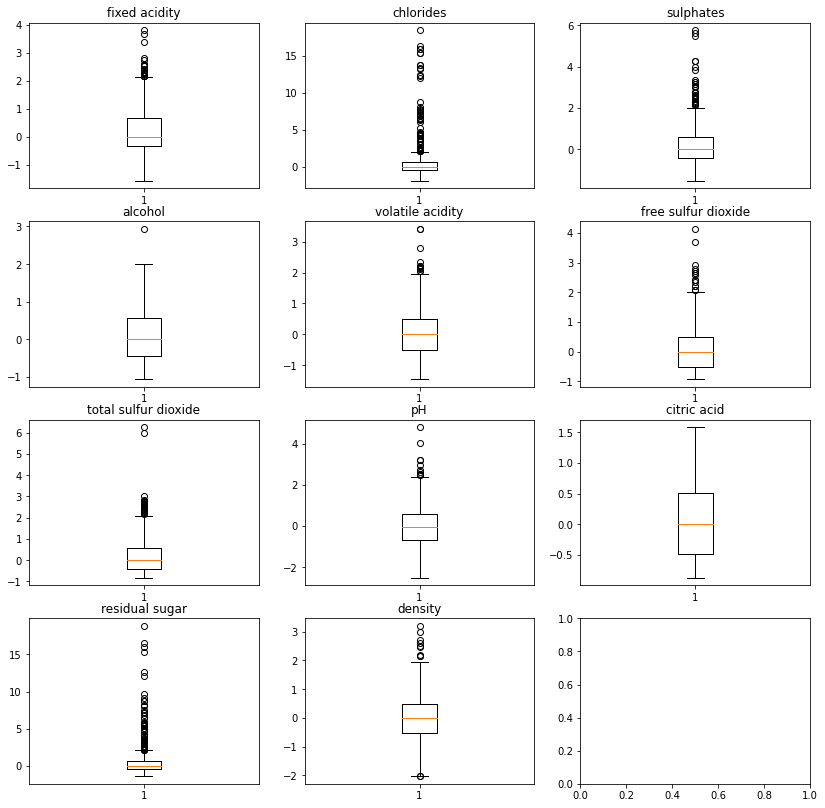

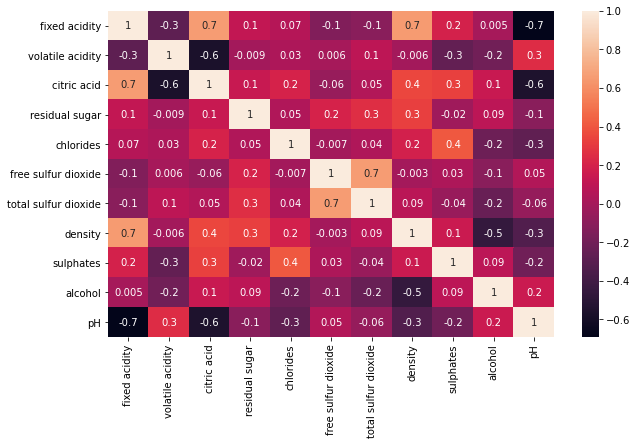

In [29]:
visualization(data4_red_train)

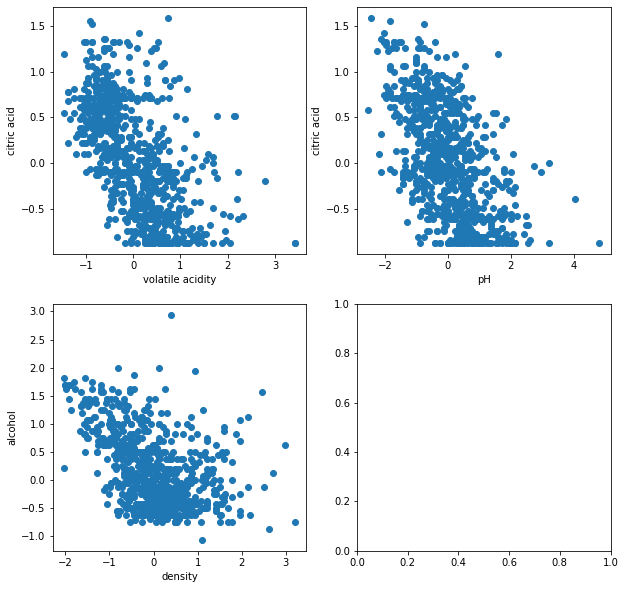

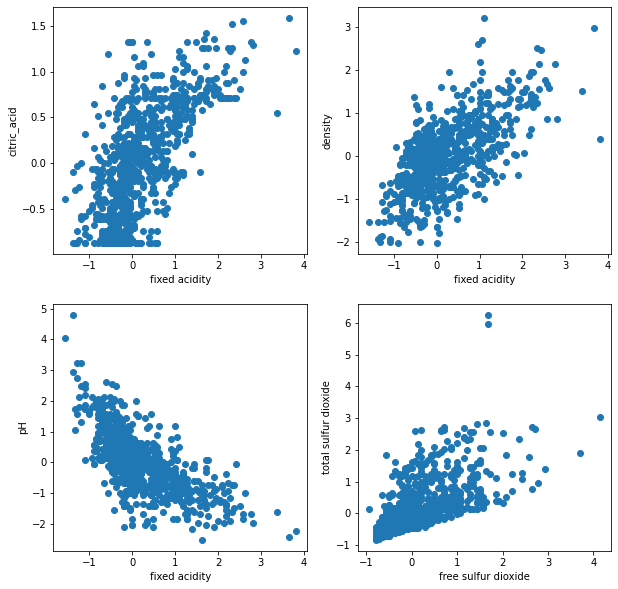

In [30]:
visual_red_scatter(data4_red_train)

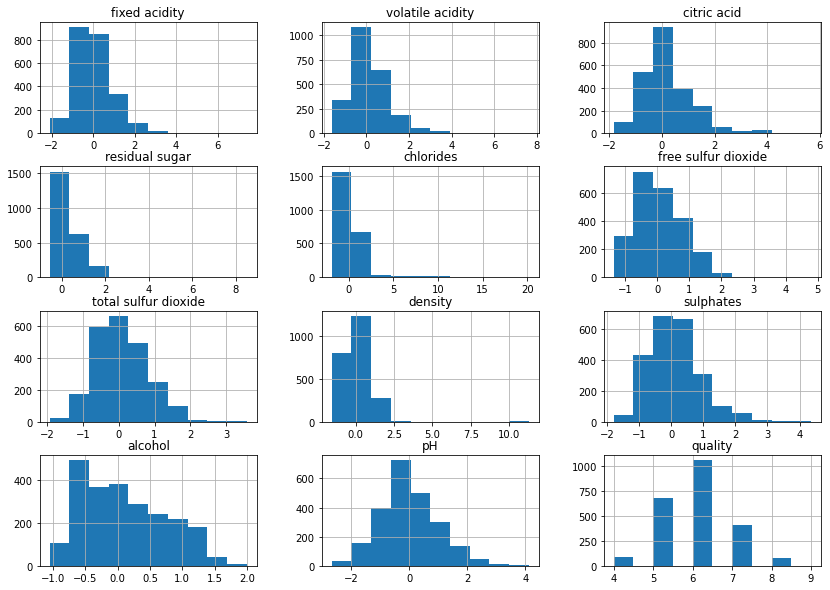

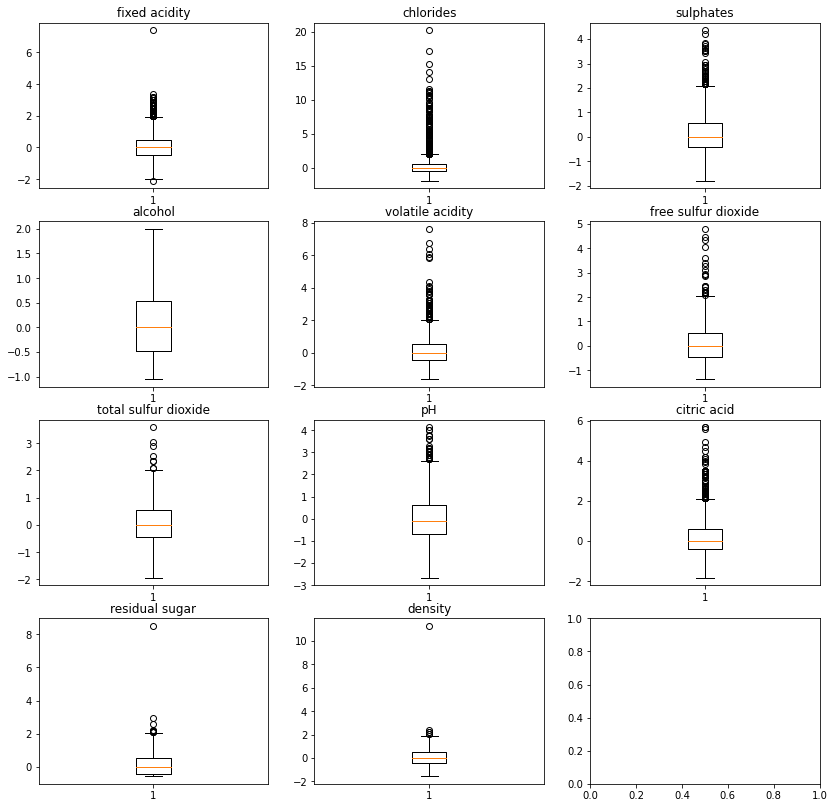

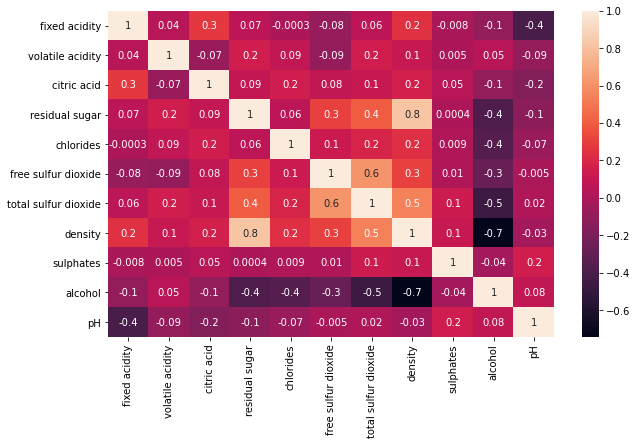

In [31]:
visualization(data4_white_train)

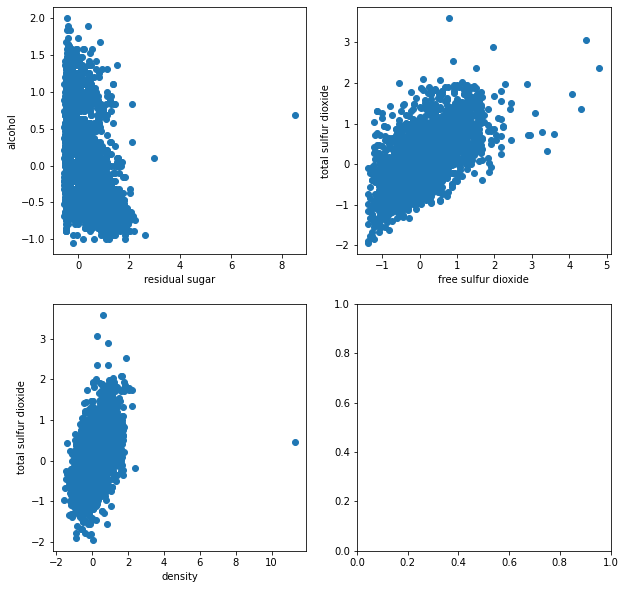

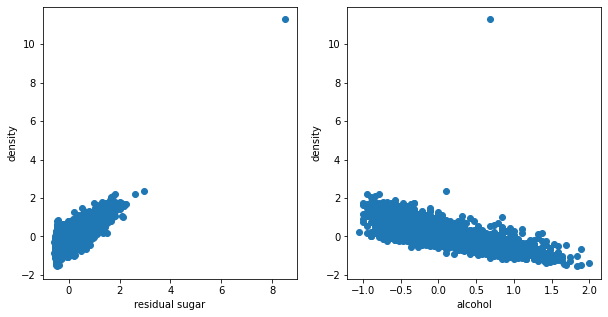

In [32]:
visual_white_scatter(data4_white_train)

In [33]:
def transform_output(data):
	data['quality'] = data['quality'].astype('str').copy()
	data.loc[data['quality'] < '5', 'quality'] = '0-4'
	data.loc[data['quality'] == '5', 'quality'] = '5'
	data.loc[data['quality'] == '6', 'quality'] = '6'
	data.loc[data['quality'] == '7', 'quality'] = '7'
	data.loc[(data['quality'] != '0-4') & (data['quality'] != '5') & (data['quality'] != '6') & (data['quality'] != '7'), 'quality'] = '8-10'
	data = pd.get_dummies(data, columns=['quality'])

	return data

In [34]:
data5_red_train = transform_output(data4_red_train)
data5_white_train = transform_output(data4_white_train)

data5_red_valid = transform_output(data4_red_valid)
data5_white_valid = transform_output(data4_white_valid)

data5_red_test = transform_output(data4_red_test)
data5_white_test = transform_output(data4_white_test)

data5_red_test['quality_8-10'] = 0

data5_red_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH,quality_0-4,quality_5,quality_6,quality_7,quality_8-10
0,-0.238095,0.791667,-0.870968,-0.428571,-0.142857,-0.214286,-0.125,0.483871,-0.411765,-0.5000,1.379711,0,1,0,0,0
1,0.190476,0.604167,-0.483871,0.142857,0.190476,0.071429,1.850,-0.069124,0.176471,-0.2500,-0.945266,0,1,0,0,0
2,1.095238,-0.375000,0.967742,1.714286,-0.428571,-0.714286,-0.725,0.161290,0.000000,-0.3750,-1.834227,0,1,0,0,0
3,-0.095238,0.750000,-0.161290,-0.428571,0.238095,0.285714,1.375,-0.299539,-0.882353,-0.4375,0.012078,0,1,0,0,0
4,-0.238095,-0.041667,0.645161,-0.285714,0.333333,0.500000,0.850,0.115207,-0.352941,-0.6875,0.353986,0,1,0,0,0


In [35]:
def get_data(data):
    y = data[['quality_0-4', 'quality_5', 'quality_6', 'quality_7', 'quality_8-10']].to_numpy()
    X = data.drop(['quality_0-4', 'quality_5', 'quality_6', 'quality_7', 'quality_8-10'], axis = 1).to_numpy()
    return X, y

In [36]:
#Итоговые данные после предобработки
x_red_train, y_red_train = get_data(data5_red_train)
x_red_valid, y_red_valid = get_data(data5_red_valid)
x_red_test, y_red_test = get_data(data5_red_test)

x_white_train, y_white_train = get_data(data5_white_train)
x_white_valid, y_white_valid = get_data(data5_white_valid)
x_white_test, y_white_test = get_data(data5_white_test)

print(f"shape red X: {x_red_train.shape}")
print(f"shape red y: {y_red_train.shape}")
print()
print(f"shape white X: {x_white_train.shape}")
print(f"shape white y: {y_white_train.shape}")

print()
print(f"size train red: {x_red_train.shape[0]}")
print(f"size train white: {x_white_train.shape[0]}")
print(f"size train data: {x_red_train.shape[0] + x_white_train.shape[0]}")

print()
print(f"size valid red: {x_red_valid.shape[0]}")
print(f"size valid white: {x_white_valid.shape[0]}")
print(f"size valid data: {x_red_valid.shape[0] + x_white_valid.shape[0]}")

print()
print(f"size test red: {x_red_test.shape[0]}")
print(f"size test white: {x_white_test.shape[0]}")
print(f"size test data: {x_red_test.shape[0] + x_white_test.shape[0]}")

shape red X: (787, 11)
shape red y: (787, 5)

shape white X: (2318, 11)
shape white y: (2318, 5)

size train red: 787
size train white: 2318
size train data: 3105

size valid red: 396
size valid white: 1149
size valid data: 1545

size test red: 134
size test white: 385
size test data: 519


In [37]:
red_weight = x_red_train.shape[0] / (x_red_train.shape[0] + x_white_train.shape[0])
white_weight = x_white_train.shape[0] / (x_red_train.shape[0] + x_white_train.shape[0])

print(f"red weight: {red_weight}")
print(f"white weight: {white_weight}")

red weight: 0.2534621578099839
white weight: 0.7465378421900161


<h3>2.3</h3>

*признаки не сокращались и не  добавлялись*

<h2>Задание 4<h2>

In [76]:
import torch.nn as nn
import torch
from tqdm.notebook import tqdm

In [39]:
class ClassNet(nn.Module):

	def __init__(self):
		super(ClassNet, self).__init__()

		self.fc1 = nn.Linear(11, 10, dtype = torch.float64)
		nn.init.xavier_normal_(self.fc1.weight)
		self.act2 = nn.functional.sigmoid

		self.fc2 = nn.Linear(10, 10, dtype = torch.float64)
		nn.init.xavier_normal_(self.fc2.weight)
		self.act3 = nn.functional.sigmoid

		self.fc3 = nn.Linear(10, 5, dtype = torch.float64)
		nn.init.xavier_normal_(self.fc3.weight)

		self.act4 = nn.Softmax(dim = 0)

	def forward(self, x, softmax = True, hard = False):

		x = self.fc1(x)
		x = self.act2(x)

		x = self.fc2(x)
		x = self.act3(x)

		x = self.fc3(x)

		if softmax:
			x = self.act4(x)

		if hard:
			x = torch.argmax(x, dim = 1)
			
		return x

<h3>4.2<h3>

In [77]:
def fit_net_4_2(net, x_train, y_train, x_valid, y_valid, x_test, y_test, batch_size, optimizer, device, epoch = 100, lr = 0.01):
	net.to(device)

	X_buf = x_train.copy()
	y_buf = y_train.copy()

	x_train = torch.from_numpy(x_train).to(device)
	y_train = torch.from_numpy(y_train).type(torch.float64).to(device)
	x_valid = torch.from_numpy(x_valid).to(device)
	y_valid = torch.from_numpy(y_valid).type(torch.float64).to(device)
	x_test = torch.from_numpy(x_test).to(device)
	y_test = torch.from_numpy(y_test).type(torch.float64).to(device)

	step_losses = []
	train_losses = []
	valid_losses = []
	test_losses = []

	CE_loss = nn.CrossEntropyLoss(weight = torch.Tensor([3, 1, 1, 1, 3])).to(device)

	n = x_train.size(dim = 0)
	for _ in tqdm(range(epoch)):

		X_y = np.array(list(zip(X_buf, y_buf)), dtype = object)
		np.random.shuffle(X_y)
		X, y = list(zip(*X_y))
		X = np.array(X)
		y = np.array(y)
		X = torch.tensor(X, requires_grad=True)
		y = torch.tensor(y, dtype = torch.float64)

		for i in range(0, n, batch_size):
			X_batch = X[i: i + batch_size].to(device)
			y_batch = y[i: i + batch_size].to(device)
			optimizer.zero_grad() 
			y_pred = net.forward(X_batch, softmax = False)
			L = CE_loss(y_pred, y_batch)
			L.backward()
			optimizer.step()

		with torch.no_grad():
			y_pred = net.forward(x_train, softmax = False)
			L_train = CE_loss(y_pred, y_train)
			train_losses.append(L_train.item())

			y_pred_test = net.forward(x_test, softmax = False)
			L_test = CE_loss(y_pred_test, y_test)
			test_losses.append(L_test.item())

			y_pred_valid = net.forward(x_valid, softmax = False)
			L_valid = CE_loss(y_pred_valid, y_valid)
			valid_losses.append(L_valid.item())
		
		if ((len(step_losses) > 0) and (step_losses[-1] < L_valid.item())):
			step_losses.append(L_valid.item())
		else:
			step_losses = [L_valid.item()]

		if len(step_losses) >= 5:
			break

	train_losses = np.array(train_losses)
	valid_losses = np.array(valid_losses)
	test_losses = np.array(test_losses)

	return train_losses, valid_losses, test_losses

In [41]:
def visualize_losses(losses_red, losses_white, title):
	data_size = min(losses_red[0].shape[0], losses_white[0].shape[0])

	train_loss = losses_red[0][:data_size] * red_weight + losses_white[0][:data_size] * white_weight
	valid_loss = losses_red[1][:data_size] * red_weight + losses_white[1][:data_size] * white_weight
	test_loss = losses_red[2][:data_size] * red_weight + losses_white[2][:data_size] * white_weight

	print(f"loss with {title}")
	print(f"\tdata size: {data_size}")
	print(f"\ttrain loss: {train_loss[-1]:.3f}")
	print(f"\ttest loss: {test_loss[-1]:.3f}")

	t = np.arange(1, data_size + 1)
	plt.figure(figsize=(12, 8))
	plt.plot(t, train_loss, label = "loss training")
	plt.plot(t, valid_loss, label = "loss valid")
	plt.plot(t, test_loss, label = "loss test")

	plt.legend(fontsize = 20, loc = 'upper right')
	plt.xlabel("t")
	plt.ylabel("$E(t)$")
	plt.title(title)
	plt.show()
	print()

In [79]:
device = torch.device('cpu')

In [43]:
net_red = ClassNet()
net_white = ClassNet()

torch.save(net_red.state_dict(), 'models_pt/model_red.pth')
torch.save(net_white.state_dict(), 'models_pt/model_white.pth')

In [80]:
param_red = {'x_train': x_red_train, 'y_train': y_red_train, 'x_valid': x_red_valid, 'y_valid': y_red_valid, 'x_test': x_red_test, 'y_test': y_red_test,
            'batch_size': 50, 
			'device': device,
            'epoch': 1000,
            'lr': 0.01}
param_white = {'x_train': x_white_train, 'y_train': y_white_train, 'x_valid': x_white_valid, 'y_valid': y_white_valid, 'x_test': x_white_test, 'y_test': y_white_test,
            'batch_size': 50, 
            'device': device,
            'epoch': 1000,
            'lr': 0.01}

def get_param(net_red, optimizer_red, net_white, optimizer_white):
	param_red_new = param_red.copy()
	param_red_new['net'] = net_red
	param_red_new['optimizer'] = optimizer_red

	param_white_new = param_white.copy()
	param_white_new['net'] = net_white
	param_white_new['optimizer'] = optimizer_white
    
	return param_red_new, param_white_new			

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

loss with lr = 0.2
	data size: 156
	train loss: 1.207
	test loss: 1.292


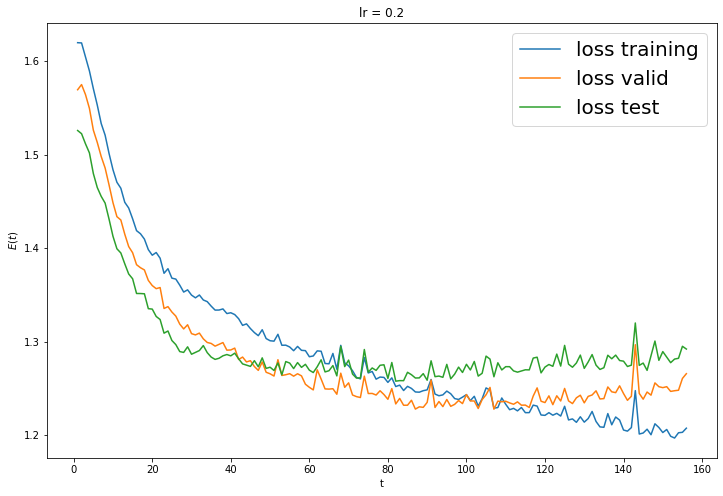

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

loss with lr = 0.1
	data size: 124
	train loss: 1.278
	test loss: 1.265


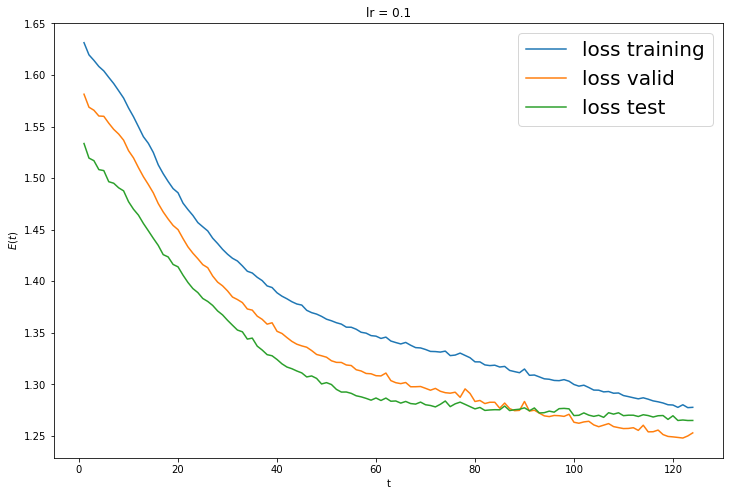

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

loss with lr = 0.05
	data size: 253
	train loss: 1.273
	test loss: 1.262


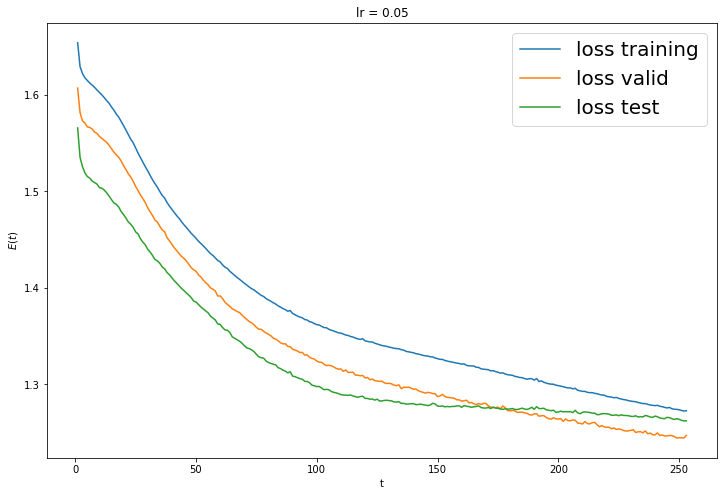

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

loss with lr = 0.0005
	data size: 1000
	train loss: 1.603
	test loss: 1.504


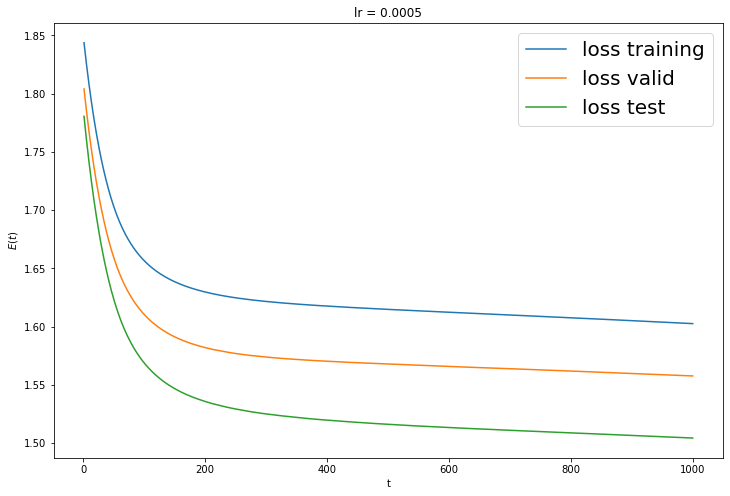

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

loss with lr = 0.5
	data size: 93
	train loss: 1.220
	test loss: 1.329


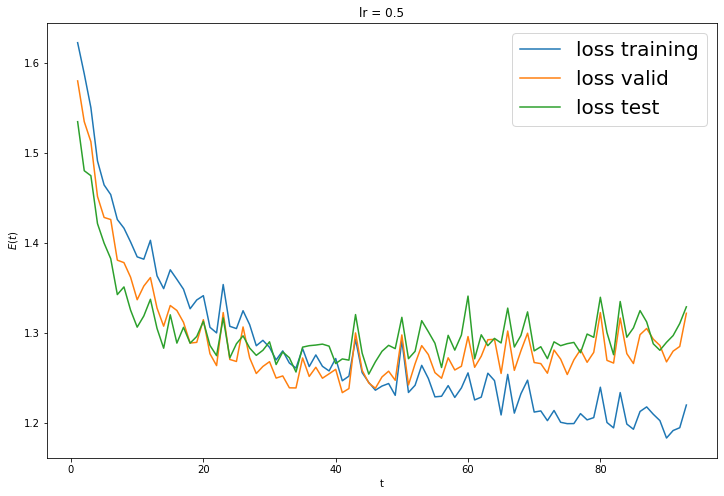

In [78]:
for lr in [0.2, 0.1, 0.05, 0.0005, 0.5]:
    net_red = ClassNet()
    net_red.load_state_dict(torch.load('models_pt/model_red.pth'))
    optimizer_red = torch.optim.SGD(net_red.parameters(), lr = lr)
    
    net_white = ClassNet()
    net_white.load_state_dict(torch.load('models_pt/model_white.pth'))
    optimizer_white = torch.optim.SGD(net_white.parameters(), lr = lr)
    
    param_red, param_white = get_param(net_red, optimizer_red, net_white, optimizer_white)
    losses_red = fit_net_4_2(**param_red)
    losses_white = fit_net_4_2(**param_white)
    visualize_losses(losses_red, losses_white, f'lr = {lr}')

<h3>4.3</h3>

loss with GDM, momentum = 0
	data size: 112
	train loss: 1.287
	test loss: 1.270


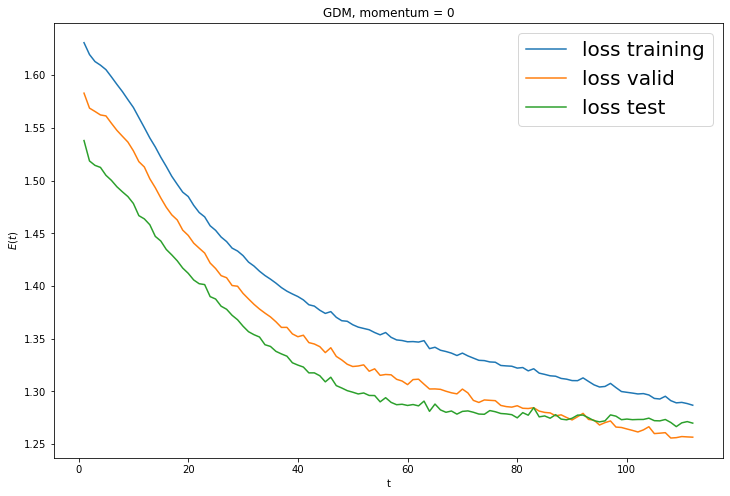


loss with NAG, momentum = 0
	data size: 142
	train loss: 1.265
	test loss: 1.265


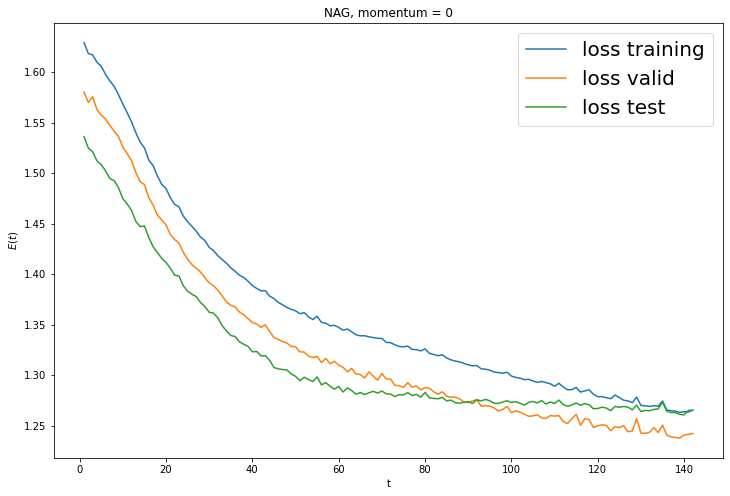


loss with GDM, momentum = 0.1
	data size: 234
	train loss: 1.210
	test loss: 1.284


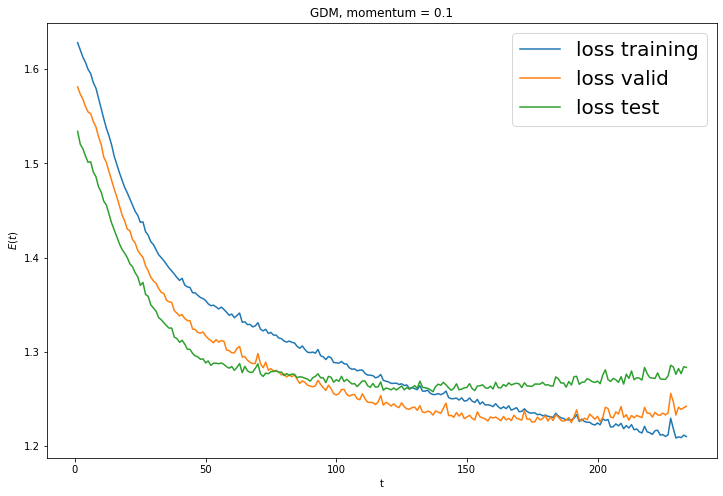


loss with NAG, momentum = 0.1
	data size: 97
	train loss: 1.296
	test loss: 1.274


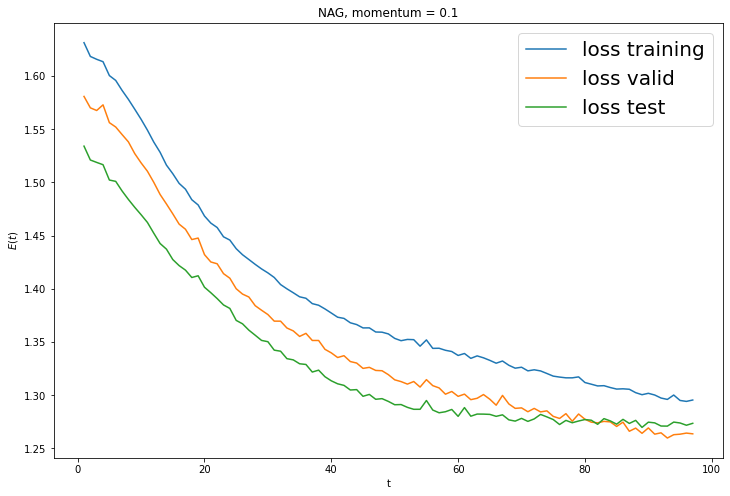


loss with GDM, momentum = 0.05
	data size: 190
	train loss: 1.233
	test loss: 1.272


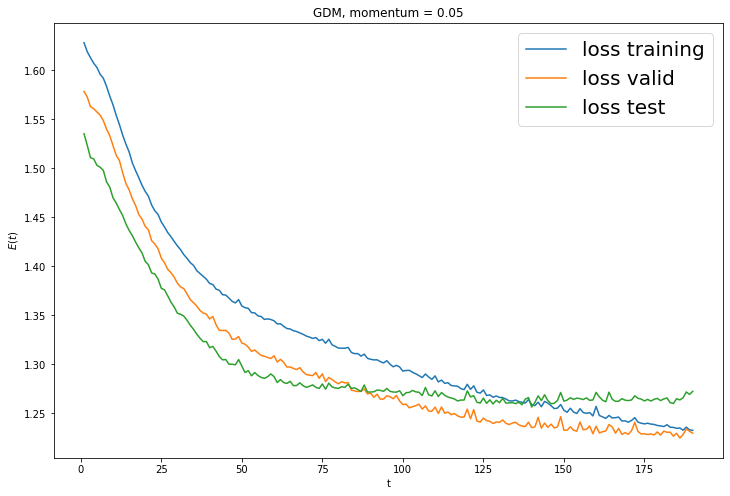


loss with NAG, momentum = 0.05
	data size: 412
	train loss: 1.170
	test loss: 1.321


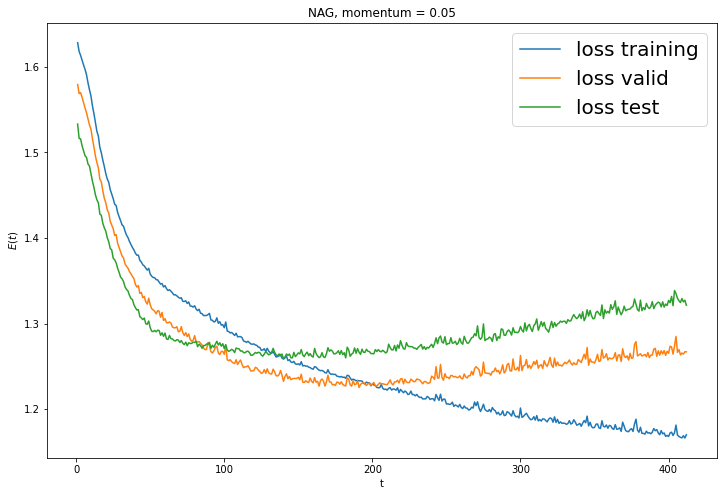


loss with GDM, momentum = 0.5
	data size: 117
	train loss: 1.225
	test loss: 1.263


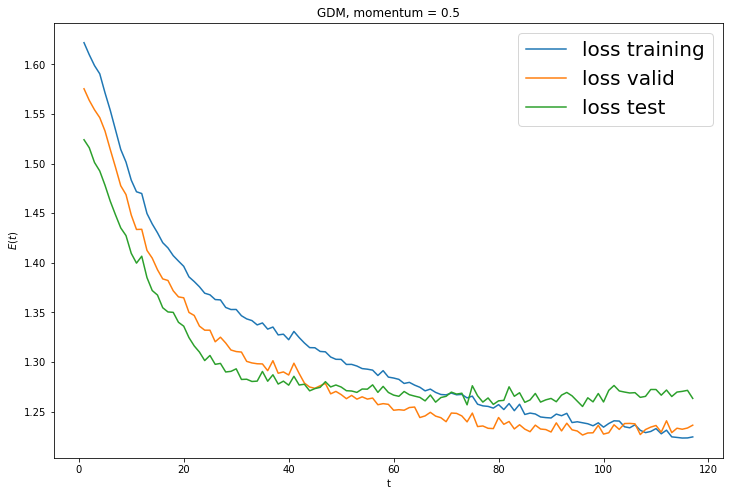


loss with NAG, momentum = 0.5
	data size: 37
	train loss: 1.333
	test loss: 1.283


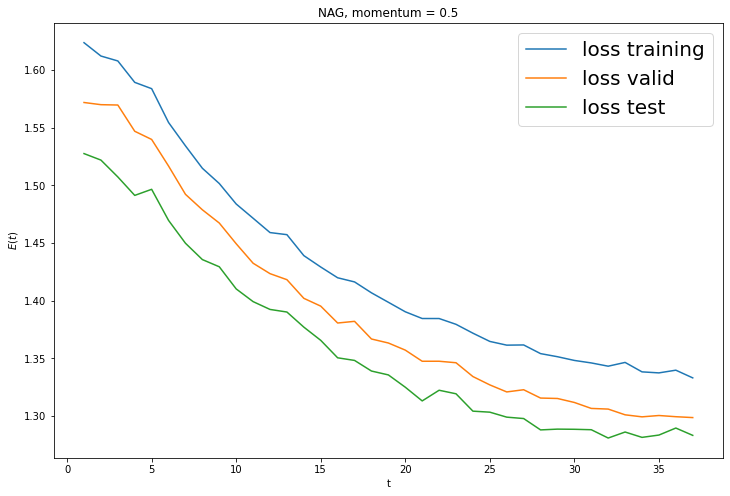

In [47]:
for momentum in [0, 0.1, 0.05, 0.5]:
    #momentum
    net1_red = ClassNet()
    net1_red.load_state_dict(torch.load('models_pt/model_red.pth'))
    optimizer1_red = torch.optim.SGD(net1_red.parameters(), lr = 0.1, momentum = momentum)
    
    net1_white = ClassNet()
    net1_white.load_state_dict(torch.load('models_pt/model_white.pth'))
    optimizer1_white = torch.optim.SGD(net1_white.parameters(), lr = 0.1, momentum = momentum)
    
    param1_red, param1_white = get_param(net1_red, optimizer1_red, net1_white, optimizer1_white)
    losses1_red = fit_net_4_2(**param1_red)
    losses1_white = fit_net_4_2(**param1_white)
    visualize_losses(losses1_red, losses1_white, f'GDM, momentum = {momentum}')
    
    #nesterov
    nesterov = True
    if not momentum:
        nesterov = False

    net2_red = ClassNet()
    net2_red.load_state_dict(torch.load('models_pt/model_red.pth'))
    optimizer2_red = torch.optim.SGD(net2_red.parameters(), lr = 0.1, momentum = momentum, nesterov = nesterov)
    
    net2_white = ClassNet()
    net2_white.load_state_dict(torch.load('models_pt/model_white.pth'))
    optimizer2_white = torch.optim.SGD(net2_white.parameters(), lr = 0.1, momentum = momentum, nesterov = nesterov)
    
    param2_red, param2_white = get_param(net2_red, optimizer2_red, net2_white, optimizer2_white)
    losses2_red = fit_net_4_2(**param2_red)
    losses2_white = fit_net_4_2(**param2_white)
    visualize_losses(losses2_red, losses2_white, f'NAG, momentum = {momentum}')

<h3>4.4</h3>

In [ ]:
# %pip install ncg_optimizer

In [74]:
import ncg_optimizer

In [81]:
def fit_net_4_4(net, x_train, y_train, x_valid, y_valid, x_test, y_test, batch_size, optimizer, device, epoch = 100, lr = 0.01):
	net.to(device)

	X_buf = x_train.copy()
	y_buf = y_train.copy()

	x_train = torch.from_numpy(x_train).to(device)
	y_train = torch.from_numpy(y_train).type(torch.float64).to(device)
	x_valid = torch.from_numpy(x_valid).to(device)
	y_valid = torch.from_numpy(y_valid).type(torch.float64).to(device)
	x_test = torch.from_numpy(x_test).to(device)
	y_test = torch.from_numpy(y_test).type(torch.float64).to(device)

	step_losses = []
	train_losses = []
	valid_losses = []
	test_losses = []

	CE_loss = nn.CrossEntropyLoss(weight = torch.Tensor([3, 1, 1, 1, 3])).to(device)

	n = x_train.size(dim = 0)
	for _ in tqdm(range(epoch)):

		X_y = np.array(list(zip(X_buf, y_buf)), dtype = object)
		np.random.shuffle(X_y)
		X, y = list(zip(*X_y))
		X = np.array(X)
		y = np.array(y)
		X = torch.tensor(X, requires_grad=True)
		y = torch.tensor(y, dtype = torch.float64, requires_grad=True)

		for i in range(0, n, batch_size):
			X_batch = X[i: i + batch_size].to(device)
			y_batch = y[i: i + batch_size].to(device)

			L = True
			def closure():
				optimizer.zero_grad()
				L = CE_loss(net.forward(X_batch, softmax = False), y_batch)
				L.backward(retain_graph = True)
				return L

			optimizer.step(closure)

		with torch.no_grad():
			
			y_pred = net.forward(x_train, softmax = False)
			L_train = CE_loss(y_pred, y_train)
			train_losses.append(L_train.item())

			y_pred_test = net.forward(x_test, softmax = False)
			L_test = CE_loss(y_pred_test, y_test)
			test_losses.append(L_test.item())

			y_pred_valid = net.forward(x_valid, softmax = False)
			L_valid = CE_loss(y_pred_valid, y_valid)
			valid_losses.append(L_valid.item())
		
		if ((len(step_losses) > 0) and (step_losses[-1] < L_valid.item())):
			step_losses.append(L_valid.item())
		else:
			step_losses = [L_valid.item()]

		if len(step_losses) >= 5:
			break

	train_losses = np.array(train_losses)
	valid_losses = np.array(valid_losses)
	test_losses = np.array(test_losses)

	return train_losses, valid_losses, test_losses

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

loss with SGD
	data size: 10
	train loss: 1.849
	test loss: 1.786


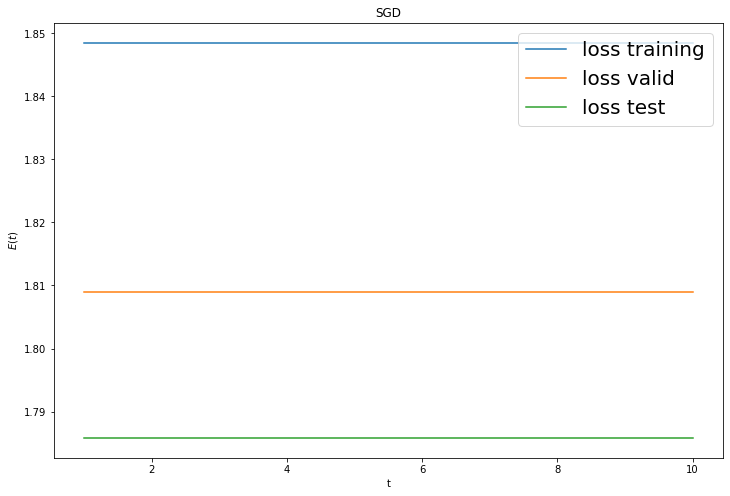

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

loss with Fletcher-Reeeves
	data size: 100
	train loss: 1.572
	test loss: 1.471


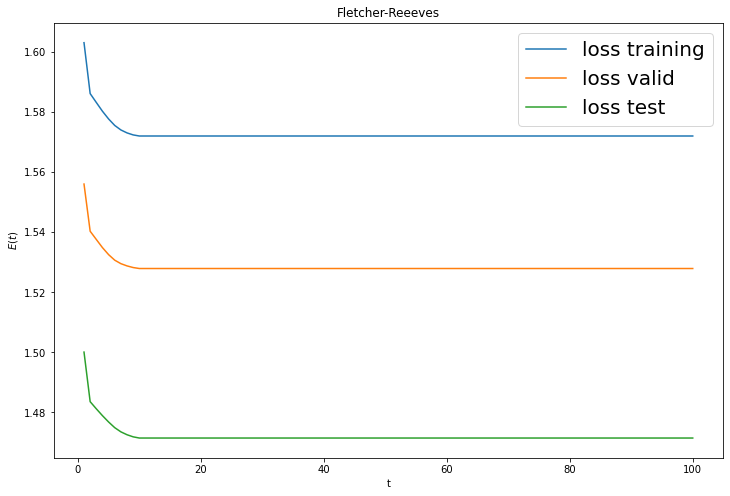

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

loss with Polak-Ribiere
	data size: 100
	train loss: 1.274
	test loss: 1.275


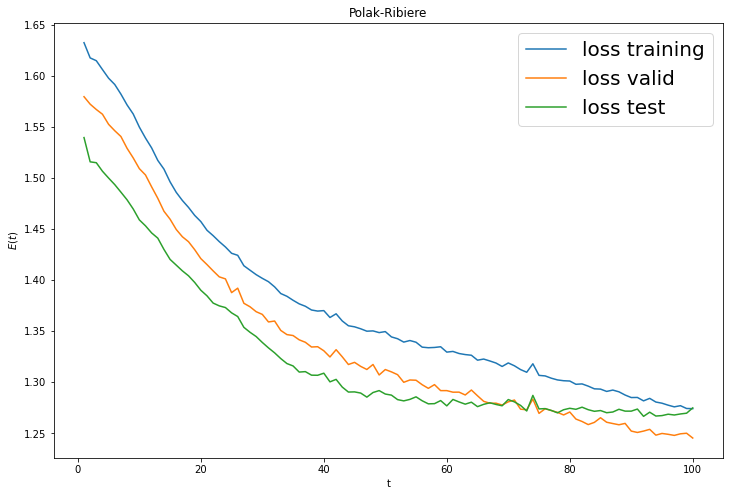

In [92]:
#SGD
net1_red = ClassNet()
net1_red.load_state_dict(torch.load('models_pt/model_red.pth'))
optimizer1_red = ncg_optimizer.LCG(net1_red.parameters(), eps = 0.1)

net1_white = ClassNet()
net1_white.load_state_dict(torch.load('models_pt/model_white.pth'))
optimizer1_white = ncg_optimizer.LCG(net1_white.parameters(), eps = 1)

param1_red, param1_white = get_param(net1_red, optimizer1_red, net1_white, optimizer1_white)
param1_red['epoch'] = 10
param1_white['epoch'] = 10

losses1_red = fit_net_4_4(**param1_red)
losses1_white = fit_net_4_4(**param1_white)
visualize_losses(losses1_red, losses1_white, f'SGD')

#Fletcher-Reeeves
net2_red = ClassNet()
net2_red.load_state_dict(torch.load('models_pt/model_red.pth'))
optimizer2_red = ncg_optimizer.BASIC(net2_red.parameters(),
                                    method = 'FR',
    								line_search = 'Armijo',
                                    c1 = 1e-4, 
    								c2 = 0.5,
                                    lr = 0.1,
                                    max_ls = 25)

net2_white = ClassNet()
net2_white.load_state_dict(torch.load('models_pt/model_white.pth'))
optimizer2_white = ncg_optimizer.BASIC(net2_white.parameters(),
                                    method = 'FR',
    								line_search = 'Armijo',
                                    c1 = 1e-4, 
    								c2 = 0.5,
                                    lr = 0.1,
                                    max_ls = 25)

param2_red, param2_white = get_param(net2_red, optimizer2_red, net2_white, optimizer2_white)
param2_red['epoch'] = 100
param2_white['epoch'] = 100

losses2_red = fit_net_4_4(**param2_red)
losses2_white = fit_net_4_4(**param2_white)
visualize_losses(losses2_red, losses2_white, f'Fletcher-Reeeves')

# #Polak-Ribiere
net3_red = ClassNet()
net3_red.load_state_dict(torch.load('models_pt/model_red.pth'))
optimizer3_red = ncg_optimizer.BASIC(net3_red.parameters(),
                                    method = 'PRP',
    								line_search = 'Armijo',
                                    c1 = 1e-4, 
    								c2 = 0.9,
                                    lr = 0.1, 
                                    rho = 0.5)

net3_white = ClassNet()
net3_white.load_state_dict(torch.load('models_pt/model_white.pth'))
optimizer3_white = ncg_optimizer.BASIC(net3_white.parameters(),
                                    method = 'PRP',
    								line_search = 'Armijo',
                                    c1 = 1e-4, 
    								c2 = 0.9,
                                    lr = 0.1, 
                                    rho = 0.5,)

param3_red, param3_white = get_param(net3_red, optimizer3_red, net3_white, optimizer3_white)
param3_red['epoch'] = 100
param3_white['epoch'] = 100

losses3_red = fit_net_4_4(**param3_red)
losses3_white = fit_net_4_4(**param3_white)
visualize_losses(losses3_red, losses3_white, f'Polak-Ribiere')

<h3>4.5</h3>

In [181]:
def fit_net_4_5(net, x_train, y_train, x_valid, y_valid, x_test, y_test, batch_size, optimizer, device, epoch = 100, lr = 0.1):
	net.to(device)

	X_buf = x_train.copy()
	y_buf = y_train.copy()

	x_train = torch.from_numpy(x_train).to(device)
	y_train = torch.from_numpy(y_train).type(torch.float64).to(device)
	x_valid = torch.from_numpy(x_valid).to(device)
	y_valid = torch.from_numpy(y_valid).type(torch.float64).to(device)
	x_test = torch.from_numpy(x_test).to(device)
	y_test = torch.from_numpy(y_test).type(torch.float64).to(device)

	step_losses = []
	train_losses = []
	valid_losses = []
	test_losses = []

	layer1_lr = []
	layer2_lr = []
	layer3_lr = []

	min_lrs = []
	avg_lrs = []
	max_lrs = []

	CE_loss = nn.CrossEntropyLoss(weight = torch.Tensor([3, 1, 1, 1, 3])).to(device)

	n = x_train.size(dim = 0)
	for _ in tqdm(range(epoch)):

		X_y = np.array(list(zip(X_buf, y_buf)), dtype = object)
		np.random.shuffle(X_y)
		X, y = list(zip(*X_y))
		X = np.array(X)
		y = np.array(y)
		X = torch.tensor(X, requires_grad=True)
		y = torch.tensor(y, dtype = torch.float64)

		for i in range(0, n, batch_size):
			X_batch = X[i: i + batch_size].to(device)
			y_batch = y[i: i + batch_size].to(device)
			optimizer.zero_grad() 
			y_pred = net.forward(X_batch, softmax = False)
			L = CE_loss(y_pred, y_batch)
			L.backward()
			optimizer.step()

		with torch.no_grad():
			y_pred = net.forward(x_train, softmax = False)
			L_train = CE_loss(y_pred, y_train)
			train_losses.append(L_train.item())

			y_pred_test = net.forward(x_test, softmax = False)
			L_test = CE_loss(y_pred_test, y_test)
			test_losses.append(L_test.item())

			y_pred_valid = net.forward(x_valid, softmax = False)
			L_valid = CE_loss(y_pred_valid, y_valid)
			valid_losses.append(L_valid.item())
		
		if ((len(step_losses) > 0) and (step_losses[-1] < L_valid.item())):
			step_losses.append(L_valid.item())
		else:
			step_losses = [L_valid.item()]

		if len(step_losses) >= 5:
			break

		min_lr = []
		avg_lr = []
		max_lr = []
		for key in optimizer.state.keys():
			if (type(key) is not int) and (type(key[0]) is torch.Tensor) and (len(key[0].shape)):
				min_lr.append(key.min())
				avg_lr.append(key.sum() / (key.shape[0] * key.shape[1]))
				max_lr.append(key.max())

				if key.shape[1] == 11:
					layer1_lr.append(key[0][5].detach().numpy())
				
				elif key.shape[0] == 10: 
					layer2_lr.append(key[0][5].detach().numpy())

				else:
					layer3_lr.append(key[0][5].detach().numpy())

		min_lrs.append(min(min_lr).detach().numpy())
		avg_val = sum(avg_lr) / len(avg_lr)
		avg_lrs.append(avg_val.detach().numpy())
		max_lrs.append(max(max_lr).detach().numpy())

	train_losses = np.array(train_losses)
	valid_losses = np.array(valid_losses)
	test_losses = np.array(test_losses)

	layer1_lr = np.array(layer1_lr)
	layer2_lr = np.array(layer2_lr)
	layer3_lr = np.array(layer3_lr)

	min_lrs = np.array(min_lrs)
	avg_lrs = np.array(avg_lrs)
	max_lrs = np.array(max_lrs)

	return train_losses, valid_losses, test_losses, layer1_lr, layer2_lr, layer3_lr, min_lrs, avg_lrs, max_lrs

In [178]:
def visualize_lrs(lrs, title):
	data_size = lrs[0].shape[0]

	t = np.arange(1, data_size + 1)
	plt.figure(figsize=(12, 8))
	plt.plot(t, lrs[0], label = "layer 1")
	plt.plot(t, lrs[1], label = "layer 2")
	plt.plot(t, lrs[2], label = "layer 3")

	plt.legend(fontsize = 20, loc = 'upper right')
	plt.xlabel("t")
	plt.ylabel("$E(t)$")
	plt.title(title)
	plt.show()
	print()

	plt.figure(figsize=(12, 8))
	plt.plot(t, lrs[3], label = "min")
	plt.plot(t, lrs[4], label = "avg")
	plt.plot(t, lrs[5], label = "max")

	plt.legend(fontsize = 20, loc = 'upper right')
	plt.xlabel("t")
	plt.ylabel("$E(t)$")
	plt.title(title)
	plt.show()
	print()

In [93]:
net_red = ClassNet()
a = torch.optim.Adagrad(net_red.parameters(), lr = 0.1)

In [146]:
prov = []
for key in a.state.keys():
	if (type(key) is not int) and (type(key[0]) is torch.Tensor) and (len(key[0].shape)):
		print('+++++++++++++++++++++++++')
		print(key.shape)

		print(key.min())
		prov.append(key.min())

+++++++++++++++++++++++++
torch.Size([10, 11])
tensor(-0.7172, dtype=torch.float64, grad_fn=<MinBackward1>)
+++++++++++++++++++++++++
torch.Size([10, 10])
tensor(-0.7597, dtype=torch.float64, grad_fn=<MinBackward1>)
+++++++++++++++++++++++++
torch.Size([5, 10])
tensor(-0.8452, dtype=torch.float64, grad_fn=<MinBackward1>)


In [149]:
min(prov)

tensor(-0.8452, dtype=torch.float64, grad_fn=<MinBackward1>)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

loss with AdaGrad
	data size: 70
	train loss: 1.237
	test loss: 1.242


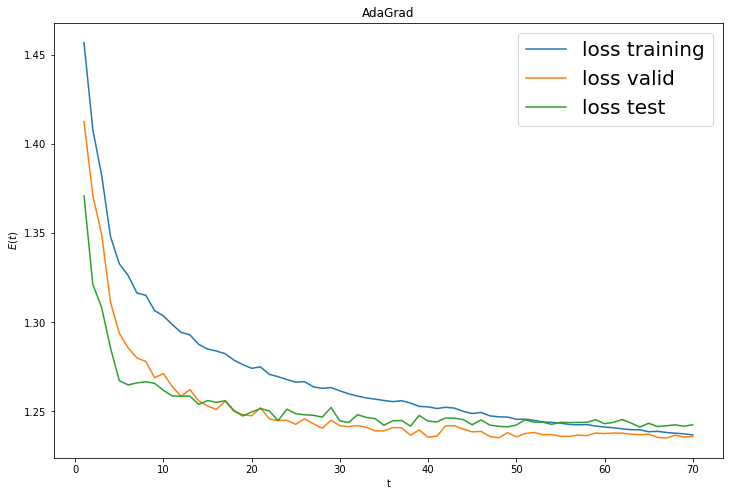

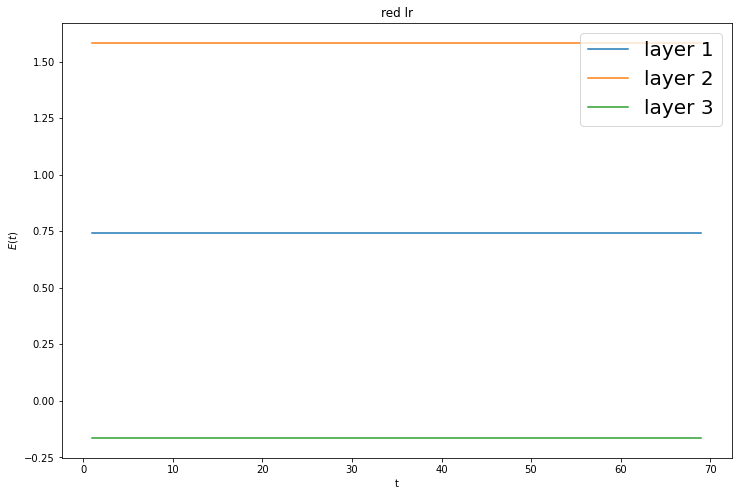

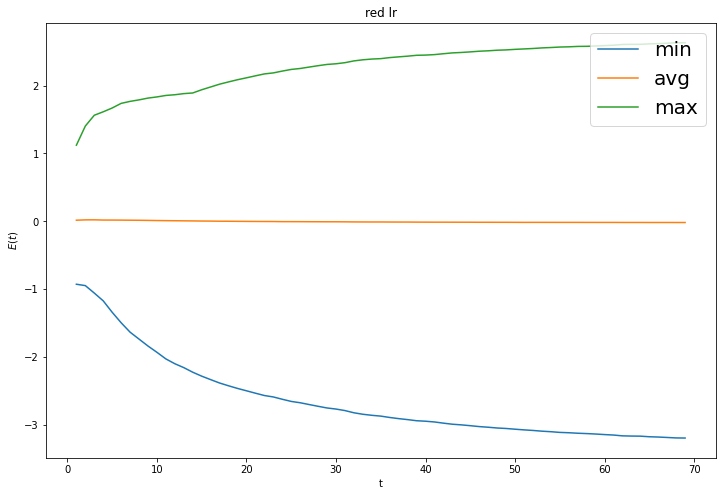

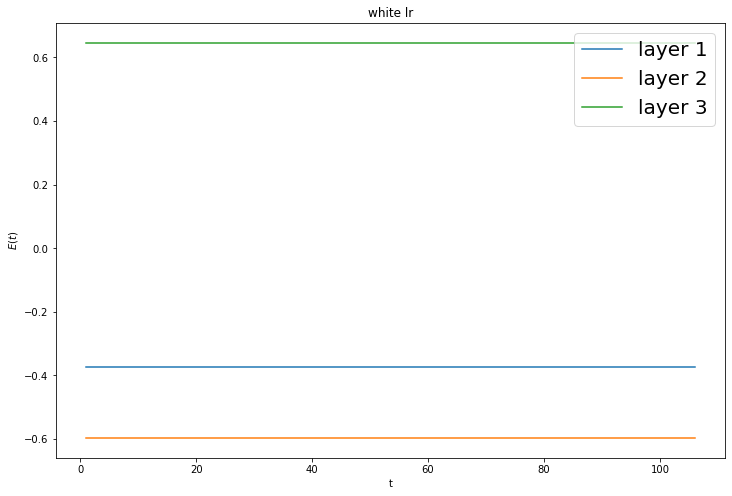

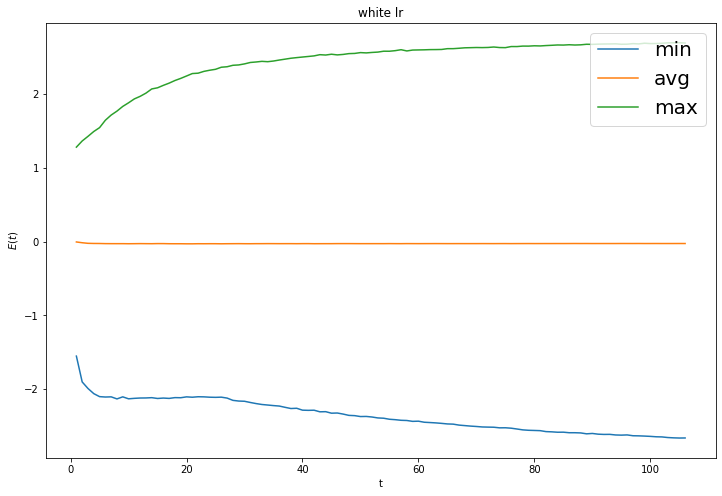

In [182]:
net_red = ClassNet()
net_red.load_state_dict(torch.load('models_pt/model_red.pth'))
optimizer_red = torch.optim.Adagrad(net_red.parameters(), lr = 0.1)

net_white = ClassNet()
net_white.load_state_dict(torch.load('models_pt/model_white.pth'))
optimizer_white = torch.optim.Adagrad(net_white.parameters(), lr = 0.1)

param_red, param_white = get_param(net_red, optimizer_red, net_white, optimizer_white)
result_red = fit_net_4_5(**param_red)
result_white = fit_net_4_5(**param_white)
visualize_losses(result_red[:3], result_white[:3], 'AdaGrad')

visualize_lrs(result_red[3:], 'red lr')
visualize_lrs(result_white[3:], 'white lr')